In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

df = pd.read_csv('epa-sea-level.csv')

df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [4]:
df.shape

(134, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


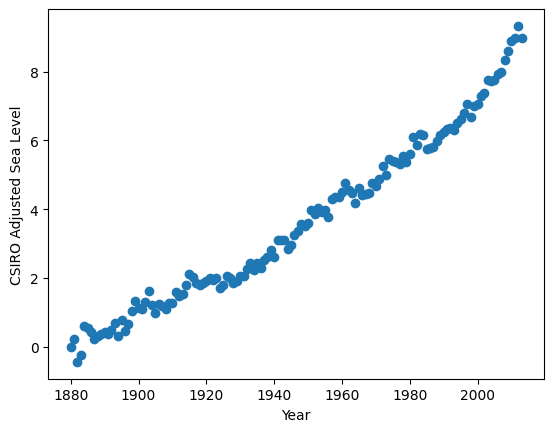

In [6]:
plt.scatter('Year', 'CSIRO Adjusted Sea Level', data = df)
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.show()

In [28]:
# Linear Regression Model

x = df['Year']
y = df['CSIRO Adjusted Sea Level']
lr1 = linregress(x, y)
lr1

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

In [52]:
# Predict sea level in 2050

def predictlr1(input):
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    lr1 = linregress(x, y)
    lr1
    input
    predictlr1 = lr1.intercept + lr1.slope*input
    return 'The sea level in %s will be %s.' %(input, round(predictlr1, 4))

predictlr1(2050)

'The sea level in 2050 will be 10.1755.'

In [53]:
years = np.linspace(2014, 2051, num=37).astype('int')
sealevel = lr1.intercept + lr1.slope*years

predict1 = pd.DataFrame(columns = ['Year', 'Sea Level'],
                       data = {'Year' : years, 'Sea Level': sealevel})

predict1.head()

,Year,Sea Level
0,2014,7.905850
1,2015,7.968895
2,2016,8.031939
3,2017,8.094984
4,2018,8.158029


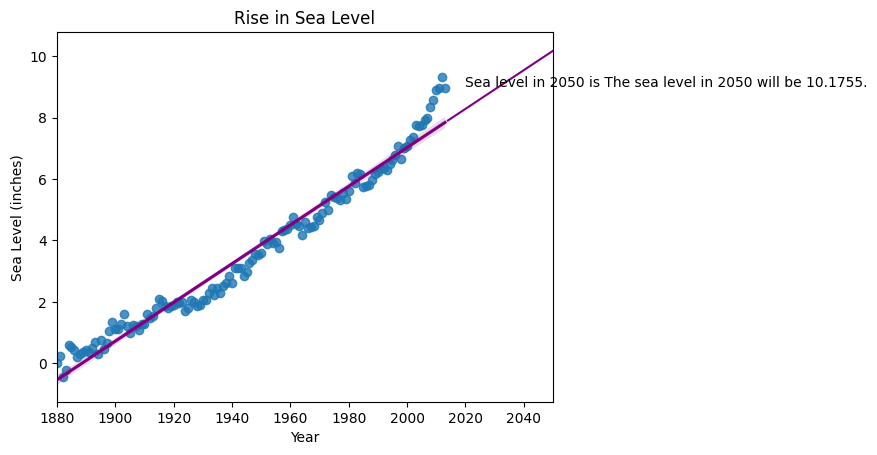

In [71]:
fig, ax = plt.subplots()
ax = sns.regplot(data = df, x=x, y=y, line_kws = {'color' : 'purple'})
ax = plt.plot(predict1['Year'], predict1['Sea Level'], color = 'purple')

plt.text(2020, 9, 'Sea level in 2050 is %s' %predictlr1(2050))

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.xlim(1880, 2050)

plt.show()

In [106]:
# build regression model with data after 2000

df_new = df.copy()
df_new.drop(df_new.index[0:120], axis =0, inplace = True)
df_new.drop(df_new.columns[2:], axis =1, inplace = True )

df_new

,Year,CSIRO Adjusted Sea Level
120,2000,7.062992
121,2001,7.287402
122,2002,7.381890
123,2003,7.759843
124,2004,7.740157
125,2005,7.744094
126,2006,7.917323
127,2007,7.996063
128,2008,8.350394
129,2009,8.586614


In [111]:
x2 = df_new['Year']
y2 = df_new['CSIRO Adjusted Sea Level']
lr2 = linregress(x2, y2)
lr2

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

In [112]:
# Predict sea level in 2050 with new model

def predictlr2(input2):
    x2 = df_new['Year']
    y2 = df_new['CSIRO Adjusted Sea Level']
    lr2 = linregress(x2, y2)
    lr2
    input2
    predictlr2 = lr2.intercept + lr2.slope*input2
    return 'The sea level in %s will be %s.' %(input2, round(predictlr2, 4))

predictlr2(2050)

'The sea level in 2050 will be 15.3824.'

In [113]:
# Preficted data with new model

sealevel2 = lr2.intercept + lr2.slope*years

predict2 = pd.DataFrame(columns = ['Year', 'Sea Level'],
                       data = {'Year' : years, 'Sea Level': sealevel2})

predict2.head()

,Year,Sea Level
0,2014,9.391062
1,2015,9.557489
2,2016,9.723916
3,2017,9.890344
4,2018,10.056771


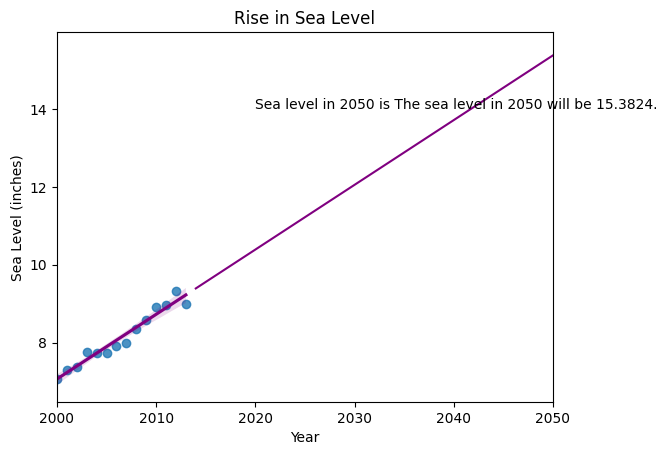

In [117]:
fig, ax = plt.subplots()
ax = sns.regplot(data = df_new, x=x2, y=y2, line_kws = {'color' : 'purple'})
ax = plt.plot(predict2['Year'], predict2['Sea Level'], color = 'purple')

plt.text(2020, 14, 'Sea level in 2050 is %s' %predictlr2(2050))

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.xlim(2000, 2050)

plt.show()